## The following notebook simulates tossing a coin repeatedly to generate a histogram of the expected outcomes.

### Import the requisite libraries and other housekeeping tasks.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

### A function that simulates n coin tosses (1 = heads, 0 = tails) with the defualt probability of each being 0.5.

In [2]:
def simulate_n_coin_tosses(n: int, probability_of_heads: float = 0.5) -> np.array:
    """Returns an ndarray of n items with each item being either a randomly selected 1 or 0."""
    coin = np.array([1, 0])
    return np.random.choice(
        coin, size=n, replace=True, p=[probability_of_heads, 1 - probability_of_heads]
    )


### A function that simulates the number of heads for n coin tosses repeated m times.

In [3]:
def simulate_m_trials_of_n_coin_tosses(
    m: int, n: int, probability_of_heads: float = 0.5
) -> np.array:
    """Returns an ndarray of the sum of heads for n coin tosses repeated m times."""
    return np.array(
        [np.sum(simulate_n_coin_tosses(n, probability_of_heads)) for _ in np.arange(m)]
    )


### Run the simulation.

In [4]:
n_coin_tosses = 100
m_trials = 100000
trials = simulate_m_trials_of_n_coin_tosses(m=m_trials, n=n_coin_tosses)


### A function to plot a histogram of m trials of n coin tosses.

In [5]:
def plot_histogram_of_trials(trials: np.array, m: int, n: int) -> None:
    """Prints a histogram of the outcomes of m trials of n coin tosses and compares 
    with expected values."""
    min_value, max_value = trials.min(), trials.max()
    x = np.arange(0, n + 1, 0.1)
    y = norm.pdf(x, np.mean(trials), np.std(trials))
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, "--k", label="calculated")
    plt.hist(
        trials,
        bins=np.arange(min_value, max_value, 1),
        align="left",
        density=True,
        ec="w",
        label="experimental",
    )
    plt.title(f"\nHistogram of {m:,} Trials of {n} Coin Tosses.\n", size=35)
    plt.xlabel(f"\nNumber of Heads in {n} Coin Tosses", size=30)
    plt.xticks(np.arange(min_value // 5 * 5 + 5, max_value + 1, 5), fontsize=20)
    plt.xlim(min_value // 5 * 5, max_value + 1)
    plt.ylabel("Probability Density\n", size=30)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.tight_layout()


### Visualize the histogram.

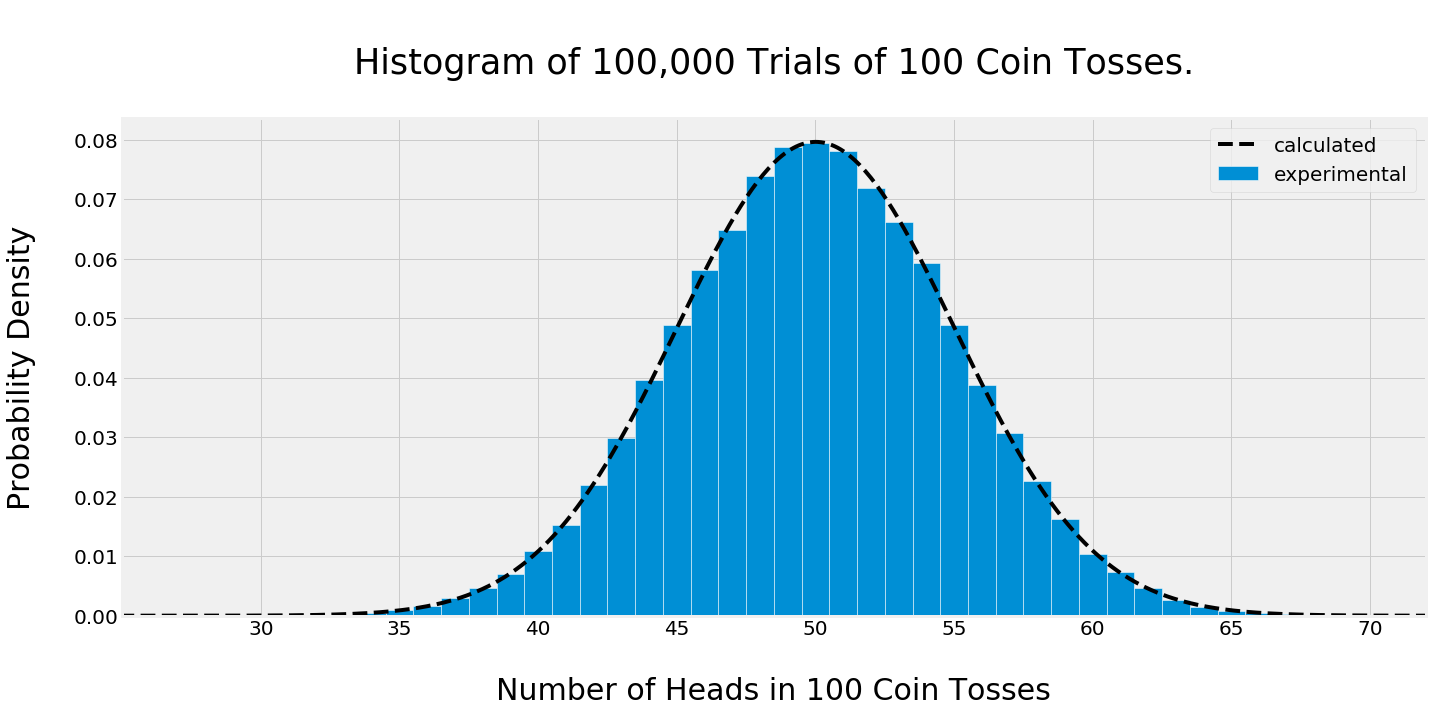

In [6]:
plot_histogram_of_trials(trials, m=m_trials, n=n_coin_tosses)

### A function to print the 95% confidence interval of the trials.

In [7]:
def print_95_confidence_interval(
    trials: np.array, m_trials: int, n_coin_tosses: int
) -> None:
    """Prints the low and high values between which 95% of the values in an ndarray 
    can be found."""
    low = int(np.percentile(trials, 2.5))
    high = int(np.percentile(trials, 97.5))
    print(
        f"95% of {m_trials:,} trials of {n_coin_tosses} coin tosses "
        f"resulted in {low}-{high} heads."
    )


### Call the above function.

In [8]:
print_95_confidence_interval(trials, m_trials, n_coin_tosses)

95% of 100,000 trials of 100 coin tosses resulted in 40-60 heads.


### Repeat the exercise for an unfair coin (probability of heads = 0.65) and for a different number of trials.

In [9]:
m_trials = 5000
n_coin_tosses = 100
p = 0.65
trials = simulate_m_trials_of_n_coin_tosses(
    m=m_trials, n=n_coin_tosses, probability_of_heads=p
)


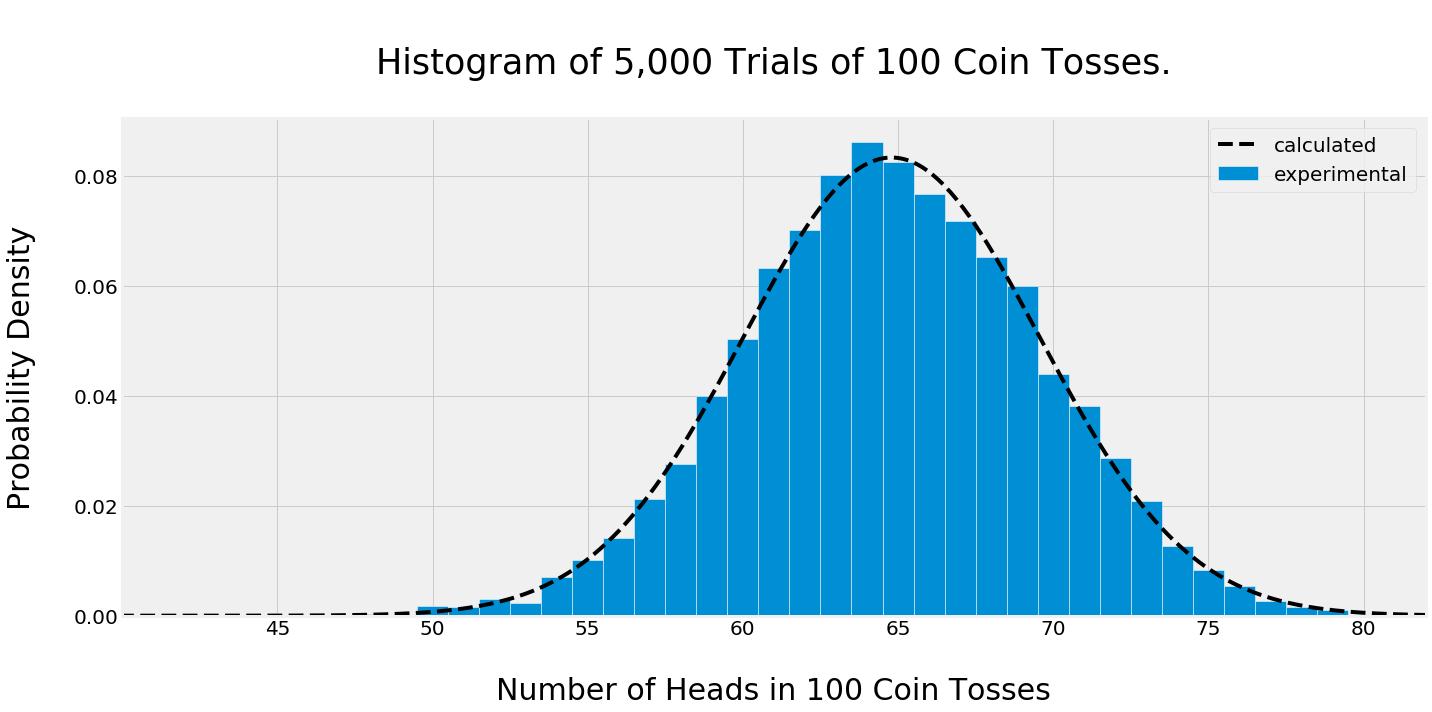

In [10]:
plot_histogram_of_trials(trials, m=m_trials, n=n_coin_tosses)

### New 95% confidence interval.

In [11]:
print_95_confidence_interval(trials, m_trials, n_coin_tosses)

95% of 5,000 trials of 100 coin tosses resulted in 55-74 heads.
